In [1]:
#importamos las bibliotecas que vamos a utilizar
import pandas as pd
import re
import src.functions as func

## Empezamos revisando y limpiando la información disponible

In [2]:
#Traemos el archivo con los datos a analizar
df = pd.read_csv('input/attacks.csv',encoding='latin-1')

In [3]:
df.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
df.shape

(25723, 24)

#### Lo primero que vamos a hacer es renombrar las columnas para que no tengamos problemas con esos espacios

In [5]:
columnas_actuales=list(df.columns)

In [6]:
nuevas_columnas=['Case', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal', 'Time',
       'Species', 'Investigator_Source', 'pdf', 'href_formula', 'href',
       'Case1', 'Case2', 'original_order', 'Unnamed: 22',
       'Unnamed: 23']
type(nuevas_columnas)

list

In [7]:
dict_columnas = {columnas_actuales[i]: nuevas_columnas[i] for i in range(len(columnas_actuales))} 
dict_columnas

{'Case Number': 'Case',
 'Date': 'Date',
 'Year': 'Year',
 'Type': 'Type',
 'Country': 'Country',
 'Area': 'Area',
 'Location': 'Location',
 'Activity': 'Activity',
 'Name': 'Name',
 'Sex ': 'Sex',
 'Age': 'Age',
 'Injury': 'Injury',
 'Fatal (Y/N)': 'Fatal',
 'Time': 'Time',
 'Species ': 'Species',
 'Investigator or Source': 'Investigator_Source',
 'pdf': 'pdf',
 'href formula': 'href_formula',
 'href': 'href',
 'Case Number.1': 'Case1',
 'Case Number.2': 'Case2',
 'original order': 'original_order',
 'Unnamed: 22': 'Unnamed: 22',
 'Unnamed: 23': 'Unnamed: 23'}

In [8]:
df=df.rename(columns = dict_columnas, inplace = False)
df.head()

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator_Source,pdf,href_formula,href,Case1,Case2,original_order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


#### Comprobamos que en la columna Unnamed 23 son todos los valores null menos 2, y en la columna Unnamed 22 todas menos 1. Eliminaremos esas columnas, no aportan información para el estudio

In [9]:
df['Unnamed: 23'].isnull().sum()

25721

In [10]:
df['Unnamed: 22'].isnull().sum()

25722

In [11]:
df_clean=df.drop(['Unnamed: 22']+['Unnamed: 23']+['original_order']+['href']+['href_formula']+['pdf']+['Investigator_Source']+['Case1']+['Case2'],axis=1)
df_clean.head()

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [12]:
df_clean.isnull().sum()

Case        17021
Date        19421
Year        19423
Type        19425
Country     19471
Area        19876
Location    19961
Activity    19965
Name        19631
Sex         19986
Age         22252
Injury      19449
Fatal       19960
Time        22775
Species     22259
dtype: int64

#### Siguen quedando filas con todos sus valores en Nan; las eliminamos igualmente

In [13]:
df_clean=df_clean.dropna(how = 'all') 
df_clean.head()

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [14]:
df_clean=df_clean.dropna(how = 'all')
df_clean.head()
#No existen más filas con NaN en todos sus campos

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


In [15]:
df_clean=df_clean.drop_duplicates()
df_clean.head()

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


#### Quitamos las filas donde todas sus columnas tienen NaN menos 'Case'

In [16]:
df_clean=df_clean.dropna(subset=[ 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity',  'Sex', 'Age', 'Injury', 'Fatal', 'Time',
       'Species' ], how='all') 
df_clean.head()

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


## Hipótesis 1:
### El mayor número de ataques se ha dado en hombres, aunque en más ocasiones las mujeres fallecen


#### Observamos la distribución de valores de género. Vemos que podemos quedarnos fácilmente con M y F únicamente 

In [17]:
df_clean['Sex'].value_counts()

M      5094
F       637
N         2
M         2
lli       1
.         1
Name: Sex, dtype: int64

In [18]:
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan 'M ' 'lli' 'N' '.']"

In [19]:
df_clean.Sex=df_clean.Sex.str.replace(r"M(.*)",'M')
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan 'lli' 'N' '.']"

In [20]:
df_clean.loc[df['Sex'] == 'lli']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
1624,2004.11.11.b,11-Nov-2004,2004.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Brian Kang,lli,38,"Lacerations to hand, knee & thigh",N,13h30,5.5 m [18'] white shark


In [21]:
df_clean['Sex'][1624]='M'

<ipython-input-21-15461415ffcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex'][1624]='M'


In [22]:
df_clean.loc[df['Sex'] == 'N']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
4938,1934.07.11,11-Jul-1934,1934.0,Boating,AUSTRALIA,New South Wales,Cronulla,Fishing,"18' boat, occupants William & Leslie Newton",N,NaN,No injury to occupants Sharks continually foll...,N,NaN,"Blue pointer, 11'"
6131,1801.12.18.R,Reported 18-Dec-1801,1801.0,Provoked,NaN,NaN,NaN,Standing on landed shark's tail,Stephen Pettigew,N,NaN,"FATAL, PROVOKED INCIDENT",Y,NaN,12' shark


In [23]:
df_clean['Sex'][6131]='M'

<ipython-input-23-1d086138ce6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Sex'][6131]='M'


In [24]:
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan 'N' '.']"

In [25]:
df_clean=df_clean[~df_clean['Sex'].isin(['N', '.'])]
df_clean
genero=str(df_clean['Sex'].unique())
genero

"['F' 'M' nan]"

####  Nos siguen quedando valores donde la columna sexo es null. En principio no podemos rellenarla con la información disponible, por lo que para validad la hipótesis, no se tendrán en cuenta en los totales (value_counts no cuenta los valores NaN)

In [26]:
df_clean.loc[df['Sex'].isnull()==True].head()

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
32,2018.04.09,09-Apr-2018,2018.0,Unprovoked,NEW CALEDONIA,NaN,"Magenta Beach, Noumea",Windsurfing,NaN,NaN,NaN,"No injury, shark bit board",N,17h00,2 m shark
59,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,NaN,FATAL,Y,NaN,Some drowned but other may have been killed by...
86,2017.09.14,Sep-2017,2017.0,Boating,AUSTRALIA,Westerm Australia,Esperance,Fishing,NaN,NaN,NaN,"sharks rammed boats, no injury to occupants",N,NaN,"White shark, 3.5m"
124,2017.07.02,02-Jul-2017,2017.0,Invalid,COMOROS,Anjouan,Moya,Fishing,NaN,NaN,NaN,"Skull found in shark, a probable drowning & sc...",NaN,NaN,Shark involvement prior to death not confirmed
154,2017.04.17.b,17-Apr-2017,2017.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",NaN,NaN,NaN,NaN,Minor bite to the foot,N,Afternoon,NaN


#### A continuación, limpiamos los valores de la columna Fatal

In [27]:
df_clean['Fatal'].value_counts()

N          4292
Y          1387
UNKNOWN      71
 N            7
y             1
M             1
N             1
2017          1
Name: Fatal, dtype: int64

In [28]:
df_clean['Fatal']=df_clean.Fatal.str.replace(r"(\s)N",'N')
df_clean['Fatal']=df_clean.Fatal.str.replace(r"N(\s)",'N')
df_clean['Fatal'].value_counts()

N          4300
Y          1387
UNKNOWN      71
y             1
M             1
2017          1
Name: Fatal, dtype: int64

In [29]:
df_clean.loc[df['Fatal'] == 'M']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m"


In [30]:
df_clean['Fatal'][285]='N'

<ipython-input-30-05fd4e36ae35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fatal'][285]='N'


In [31]:
df_clean.loc[df['Fatal'] == '2017']

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m"


In [32]:
df_clean['Fatal'][786]='N'

<ipython-input-32-8aefa6e0c14a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Fatal'][786]='N'


In [33]:
df_clean['Fatal']=df_clean.Fatal.str.replace(r"y",'Y')
df_clean['Fatal'].value_counts()

N          4302
Y          1388
UNKNOWN      71
Name: Fatal, dtype: int64

In [34]:
df_clean.loc[df['Fatal'] == 'UNKNOWN'].head()

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
624,2013.09.08,08-Sep-2013,2013.0,Unprovoked,USA,South Carolina,"St. Helena Island, Beaufort County",NaN,female,F,NaN,No details,UNKNOWN,NaN,NaN
1270,2008.04.20.a,20-Apr-2008,2008.0,Unprovoked,AUSTRALIA,New South Wales,Crescent Head,NaN,Jamie Adlington,M,NaN,NaN,UNKNOWN,NaN,"Tiger shark, 2.3m"
2250,1997.06.07,07-Jun-1997,1997.0,Unprovoked,BRAZIL,Rio de Janeiro,"Copacabana, Rio de Janeiro",Bathing,José Luiz Lipiani,M,NaN,NaN,UNKNOWN,NaN,NaN
2260,1997.02.21,21-Feb-1997,1997.0,Unprovoked,USA,Hawaii,"Sunset Beach, O'ahu",NaN,Gersome Perreno,M,NaN,No details,UNKNOWN,NaN,NaN
2267,1996.12.29,29-Dec-1996,1996.0,Unprovoked,AUSTRALIA,Queensland,Coolum Beach,Surfing,Blair Hall,M,18,NaN,UNKNOWN,18h00,NaN


#### Como esos valores "desconocido" son pocos en comparación con el total de casos con información, y no podemos completar esas filas de ninguna forma, vamos a quitarlas para el análisis

In [35]:
df_clean=df_clean[~df_clean['Fatal'].isin(['UNKNOWN'])]
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


#### Como veo que hay menos valores de fatal que en todo el dataFrame, voy a buscar los valores nulos. 

In [36]:
df_clean.loc[df['Fatal'].isnull()==True].head()

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
27,2018.04.15.c,15-Apr-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,Piedade,Swimming,Pablo de Melo,M,34,"Multiple severe injuries to arms and leg, leg ...",NaN,NaN,NaN
76,2017.10.01,01-Oct-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Dyer Island,Scuba Diving,Bradley Fick,M,31,FATAL,NaN,NaN,Death may have been due to drowning
79,2017.09.24.b,24-Sep-2017,2017.0,Invalid,USA,New York,Rockaway,Surfing,Michah Behrend,M,33,"Lacerations to right ankle, foot & toe",NaN,15h30,Questionable
84,2017.09.15.b,15-Sep-2017,2017.0,Invalid,SOUTH AFRICA,Western Cape Province,Hawston,Scuba Diving,Wayon Love,M,25,"FATAL, but death was probably due to drowning",NaN,Afternoon,NaN
98,2017.08.26.b,26-Aug-2017,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Lacerations to left foot,NaN,Midday,Shark involvement questionable


#### Existen valores de la columna Injury que tienen la palabra Fatal; vamos a buscarlos para completar la columna Fatal:

In [37]:
injury=list(df_clean.Injury.items())
for i in injury:
    fatal = re.findall(r"FATAL*",str(i[1]))
    if fatal:
        df_clean.Fatal[i[0]]='Y'

<ipython-input-37-2362f6ea65dd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Fatal[i[0]]='Y'


In [38]:
df_clean['Fatal'].value_counts()

N    4301
Y    1428
Name: Fatal, dtype: int64

#### Vamos a arreglar la columna year para saber de qué intervalo temporal vamos a sacar datos. Cogeremos la información de Date

In [39]:
df_clean[df_clean['Year']==0].head()

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN


In [40]:
df_clean[df_clean['Year']==0]

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,NaN,"FATAL, shark/s bit him in two",Y,NaN,NaN
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,NaN,"FATAL, shark ""bit off all lower parts of him u...",Y,NaN,NaN
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,NaN,Herodotus tells of sharks attacking men in the...,Y,NaN,NaN
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,NaN,Depicts shipwrecked sailors attacked by a sha...,Y,NaN,NaN
6181,ND-0154,Before 1939,0.0,Unprovoked,CANADA,NaN,Grand Banks,Fishing,Joe Folsom,M,NaN,Arm bitten,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


In [41]:
date=list(df_clean.Date.items())
for i in date:
    if df_clean['Year'][i[0]]==0:
        num = re.findall(r"\d{3}\sB.C.",str(i[1]))
        if num:
            df_clean['Year'][i[0]]=-int(num[0][-9:-5])
for i in date:
    if df_clean['Year'][i[0]]==0:
        num = re.findall(r"\d{3}.B.C.",str(i[1]))
        if num:
            df_clean['Year'][i[0]]=-int(num[0][-9:-5])
    if df_clean['Year'][i[0]]==0:
        num = re.findall(r"\d{4}-\d{4}",str(i[1]))
        if num:
            df_clean['Year'][i[0]]=num[0][5:]

for i in date:
    if df_clean['Year'][i[0]]==0:
        num = re.findall(r"\w+\s\d{4}",str(i[1]))
        if num:
            df_clean['Year'][i[0]]=num[0][-4:]
for i in date:
    if df_clean['Year'][i[0]]==0:
        num = re.findall(r"\w+[\d{4}]",str(i[1]))
        if num:
            df_clean['Year'][i[0]]=num[0][-4:]  
for i in date:
    if df_clean['Year'][i[0]]==0:
        num = re.findall(r"World War II",str(i[1]))
        if num:
            df_clean['Year'][i[0]]=1945

<ipython-input-41-2b6cff722ff4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'][i[0]]=-int(num[0][-9:-5])
<ipython-input-41-2b6cff722ff4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'][i[0]]=-int(num[0][-9:-5])
<ipython-input-41-2b6cff722ff4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'][i[0]]=num[0][5:]
<ipython-input-41-2b6cff722ff4>:21: SettingWithCopyWarning: 
A value is tr

#### Ahora sólo quedan 7 registros sin Date; precindiremos de ellos

In [42]:
df_clean[df_clean['Year']==0]

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
6217,ND.0097,No date,0.0,Unprovoked,USA,Florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,NaN,Hand bitten,N,NaN,NaN
6218,ND.0096,No date,0.0,Unprovoked,REUNION,Grand'Anse,Petite-île,yachtsman in a zodiac,NaN,M,NaN,Survived,N,NaN,NaN
6261,ND.0042,"""Before the war""",0.0,Unprovoked,AUSTRALIA,Torres Strait,Thursday Island?,Free diving,Mortakee,M,NaN,Head bitten,N,NaN,NaN
6275,ND.0027,No date,0.0,Unprovoked,GREECE,Dodecanese Islands,Symi Island,Sponge diving,Psarofa-gomenes,M,NaN,Head bitten,N,NaN,NaN
6279,ND.0023,No date,0.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,NaN,Ankle bitten,N,NaN,NaN
6280,ND.0022,No date,0.0,Unprovoked,AUSTRALIA,NaN,NaN,Pearl diving,Jaringoorli,M,NaN,Lacerations to thigh,N,NaN,NaN
6281,ND.0021,No date,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Swimming in pool formed by construction of a w...,Indian boy,M,NaN,"FATAL, leg severed",Y,NaN,NaN


In [43]:
df_clean=df_clean[~df_clean['Year'].isin([0])]
df_clean

,Case,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal,Time,Species
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,1903.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN
6298,ND.0004,Before 1903,1903.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN
6299,ND.0003,1900-1905,1905.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN
6300,ND.0002,1883-1889,1889.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN


#### Vamos a hacer un groupby por la columna con mayor número de datos; lo compruebo:

In [44]:
tabla_fatal=df_clean[df_clean['Fatal']=='Y'][['Sex','Case']]
tabla_fatal['Case'].isnull().sum()

0

In [45]:
tabla_fatal=tabla_fatal.groupby("Sex").agg({"Case":"count"})
display(tabla_fatal)

,Case
Sex,
F,110
M,1207


In [46]:
tabla_sexo=df_clean.groupby("Sex").agg({"Fatal":"count"})
display(tabla_sexo)

,Fatal
Sex,
F,577
M,4686


In [47]:
tablas= pd.concat([tabla_fatal,tabla_sexo], axis=1)
tablas.columns = ["Accidentes mortales","Casos Totales"]
tablas

,Accidentes mortales,Casos Totales
Sex,,
F,110,577
M,1207,4686


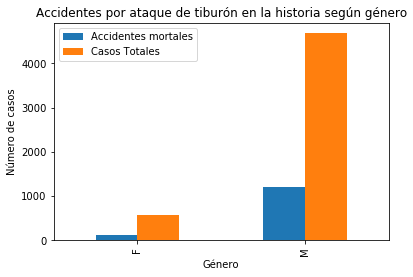

In [48]:
tablas.plot.bar(title='Accidentes por ataque de tiburón en la historia según género' ,xlabel='Género',ylabel= "Número de casos")

### Comprobamos que los accidentes han sido más mortales en el caso de los hombres

In [49]:
fatalFperc=tabla_fatal.Case.F.sum()/tabla_sexo.Fatal.F.sum()
fatalMperc=tabla_fatal.Case.M.sum()/tabla_sexo.Fatal.M.sum()

In [51]:
Fatal_perc=[round(fatalFperc*100,2), round(fatalMperc*100,2)]
Fatal_perc

[19.06, 25.76]

In [52]:
tablas['Fatal Percent per sex']=Fatal_perc
tablas

,Accidentes mortales,Casos Totales,Fatal Percent per sex
Sex,,,
F,110,577,19.06
M,1207,4686,25.76


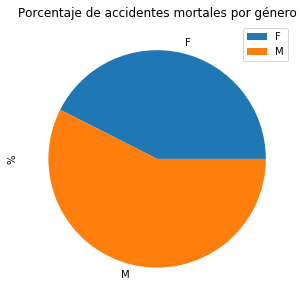

In [57]:
plot = tablas.plot.pie(y='Fatal Percent per sex', title= "Porcentaje de accidentes mortales por género", ylabel='%',figsize=(5, 5))

# Hipótesis 2
### La mayor parte de los ataques fueron producidos a surfistas

In [30]:
#Veo si hay suficientes datos
actividad=str(df_clean['Activity'].unique())
actividad


"['Paddling' 'Standing' 'Surfing' ...\n 'Crew swimming alongside their anchored ship' '4 men were bathing'\n 'Wreck of  large double sailing canoe']"

In [69]:
#Voy a intentar agrupar las actividades limpiándolas
df_clean['Activity'].value_counts().head(10)

Swimming        1068
Surfing         1020
Fishing          629
Spearfishing     409
Bathing          182
Wading           147
Diving           122
Standing          99
Snorkeling        89
Scuba diving      76
Name: Activity, dtype: int64

In [83]:
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)surfing(.*)",'Surfing')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Surfing(.*)",'Surfing')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Swimming(.*)",'Swimming')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)swimming(.*)",'Swimming')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Fishing(.*)",'Fishing')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)fishing(.*)",'Fishing')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Spearfishing(.*)",'Spearfishing')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Bathing(.*)",'Bathing')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Wading(.*)",'Wading')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Diving(.*)",'Diving')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)diving(.*)",'Diving')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Standing(.*)",'Standing')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Snorkeling(.*)",'Snorkeling')
df_clean.Activity=df_clean.Activity.str.replace(r"(.*)Scuba diving(.*)",'Scuba diving')

In [69]:
tabla_activity=df_clean['Activity'].value_counts().head()

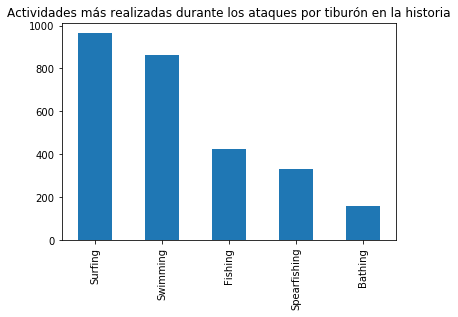

In [72]:
tabla_activity.plot.bar(title='Actividades más realizadas durante los ataques por tiburón en la historia')